# scikit-learn入门

* 准备数据集

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X = np.random.randint(0, 100, (10, 4))
y = np.random.randint(0, 3, 10)
y.sort()

print('样本：')
print(X)
print('标签：', y)

样本：
[[65  8 25 75]
 [98 25 96 19]
 [70 53 72 93]
 [87 80 65 80]
 [54 84  8 39]
 [34 34 64  3]
 [40 21 33 84]
 [42 78 80 44]
 [ 4 39 98 62]
 [82  5  2 21]]
标签： [0 0 0 0 0 1 1 1 2 2]


In [3]:
# 分割训练集、测试集
# random_state确保每次随机分割得到相同的结果
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

print('训练集：')
print(X_train)
print(y_train)

print('测试集：')
print(X_test)
print(y_test)

训练集：
[[98 25 96 19]
 [82  5  2 21]
 [42 78 80 44]
 [87 80 65 80]
 [40 21 33 84]
 [54 84  8 39]]
[0 2 1 0 1 0]
测试集：
[[ 4 39 98 62]
 [34 34 64  3]
 [65  8 25 75]
 [70 53 72 93]]
[2 1 0 0]


In [4]:
# 特征归一化
from sklearn import preprocessing

x1 = np.random.randint(0, 1000, 5).reshape(5,1)
x2 = np.random.randint(0, 10, 5).reshape(5, 1)
x3 = np.random.randint(0, 100000, 5).reshape(5, 1)

X = np.concatenate([x1, x2, x3], axis=1)
print(X)

[[  403     3 78347]
 [  470     7 96655]
 [  520     8 91834]
 [   68     6 14779]
 [  701     5 43348]]


In [5]:
print(preprocessing.scale(X))

[[-0.14181726 -1.62746694  0.42697412]
 [ 0.18137173  0.69748583  1.01232743]
 [ 0.42255754  1.27872403  0.8581878 ]
 [-1.75776219  0.11624764 -1.60545646]
 [ 1.29565018 -0.46499055 -0.69203289]]


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


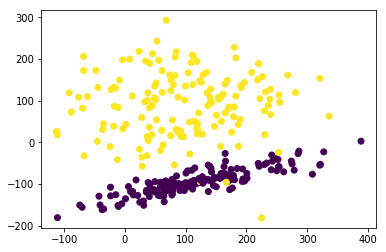

In [9]:
# 生成分类数据进行验证scale的必要性
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=25, n_clusters_per_class=1, scale=100)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [10]:
from sklearn import svm

# 注释掉以下这句表示不进行特征归一化     
# X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

0.52000000000000002

* 训练模型

In [11]:
# 回归模型
from sklearn import datasets

boston_data = datasets.load_boston()
X = boston_data.data
y = boston_data.target

print('样本：')
print(X[:5, :])
print('标签：')
print(y[:5])

样本：
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.

In [12]:
# 选择线性回顾模型
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

# 分割训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

In [14]:
# 训练模型
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# 返回参数
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [16]:
lr_model.score(X_train, y_train)

0.75967081116060942

In [17]:
lr_model.score(X_test, y_test)

0.66980061222857823

* 交叉验证

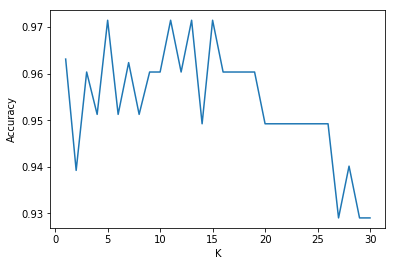

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=10) 

k_range = range(1, 31)
cv_scores = []
for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # 分类问题使用
    #scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # 回归问题使用
    cv_scores.append(scores.mean())
    
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# 选择最优的K
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)
print(best_knn.score(X_test, y_test))
print(best_knn.predict(X_test))

0.96
[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2]
